In [ ]:
# Import Libraries
import requests
import numpy as np
import pandas as pd

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

In [ ]:
# Read data and rename columns according to NeuralProphet
df = pd.read_csv('/content/yahoo_finance_data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,52.651001,53.799000,52.651001,53.660500,53.660500,31766000
1,2018-01-03,53.696499,54.805000,53.671501,54.576000,54.576000,31318000
2,2018-01-04,54.854500,55.203999,54.713001,54.787998,54.787998,26052000
3,2018-01-05,55.172501,55.679001,55.090000,55.514500,55.514500,30250000
4,2018-01-08,55.549999,55.958000,55.500000,55.710499,55.710499,24644000


In [ ]:
new_df = df.reset_index()['Adj Close']

In [ ]:
# Normalizing our data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1,1))

In [ ]:
# Split into training and testing sets
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [ ]:
# Define the sequence length (number of past time steps)
n_past = 50

# Prepare sequences for LSTM
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(755, 50)
(755,)


Testing set size:-
(152, 50)
(152,)


(None, None)

In [ ]:
# Reshape input data for LSTM([samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Model training

In [ ]:
# Initialize a sequential model
model = Sequential()

# First LSTM layer with 96 units, input shape, and return sequences
model.add(LSTM(units=96, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))         # Adding dropout to prevent overfitting

# Second LSTM layer with 96 units and return sequences
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with 96 units and return sequences
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))

#Forth LSTM layer with 96 units
model.add(LSTM(units=96))
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 50, 96)            37632     
                                                                 
 dropout_14 (Dropout)        (None, 50, 96)            0         
                                                                 
 lstm_15 (LSTM)              (None, 50, 96)            74112     
                                                                 
 dropout_15 (Dropout)        (None, 50, 96)            0         
                                                                 
 lstm_16 (LSTM)              (None, 50, 96)            74112     
                                                                 
 dropout_16 (Dropout)        (None, 50, 96)            0         
                                                                 
 lstm_17 (LSTM)              (None, 96)               

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# Defining our callbacks
checkpoints = ModelCheckpoint(filepath = 'my_weights.h5', save_best_only = True)
# Defining our early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training our lstm model
history = model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints])

Epoch 1/50
24/24 [==============================] - 9s 75ms/step - loss: 0.0072 - val_loss: 0.0213
Epoch 2/50
 9/24 [==========>...................] - ETA: 0s - loss: 0.0020

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 0.0041
Epoch 3/50
24/24 [==============================] - 0s 14ms/step - loss: 0.0017 - val_loss: 0.0043
Epoch 4/50
24/24 [==============================] - 0s 16ms/step - loss: 0.0016 - val_loss: 0.0064
Epoch 5/50
24/24 [==============================] - 0s 16ms/step - loss: 0.0013 - val_loss: 0.0094
Epoch 6/50
24/24 [==============================] - 0s 16ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 7/50
24/24 [==============================] - 0s 15ms/step - loss: 9.8813e-04 - val_loss: 0.0026
Epoch 8/50
24/24 [==============================] - 0s 16ms/step - loss: 0.0010 - val_loss: 0.0064
Epoch 9/50
24/24 [==============================] - 0s 17ms/step - loss: 9.5587e-04 - val_loss: 0.0014
Epoch 10/50
24/24 [==============================] - 0s 16ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 11/50
24/24 [==============================] - 0s 16ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 12/50

In [ ]:
# Let's do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 7ms/step


In [ ]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

loss at epoch 1: 0.007246219087392092
loss at epoch 50: 0.0005099017289467156


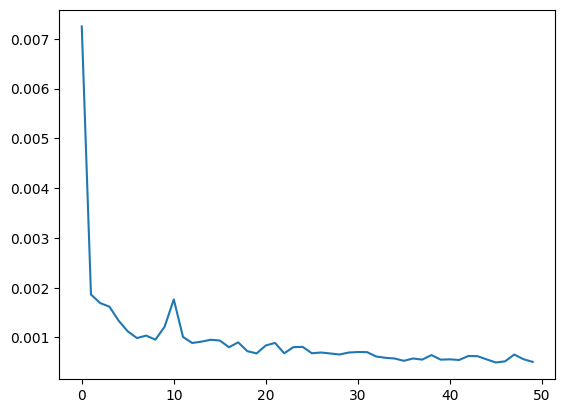

In [ ]:
print(f"loss at epoch 1: {history.history['loss'][0]}")
print(f"loss at epoch 50: {history.history['loss'][49]}")
plt.plot(history.history['loss'])

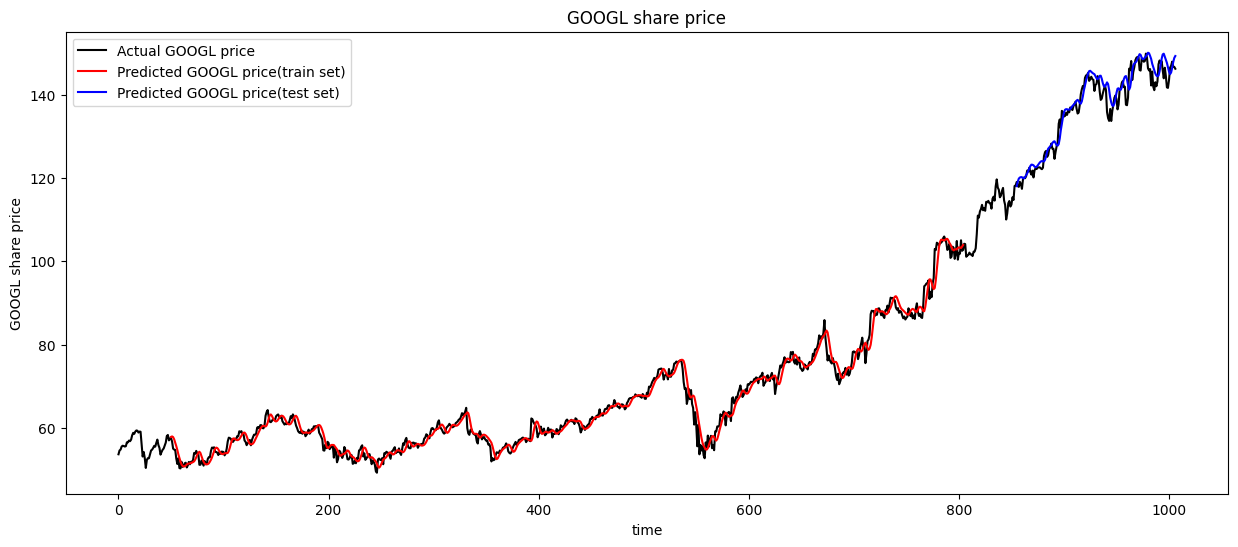

In [ ]:
# Set the number of previous time steps to consider for plotting
look_back = 50

# Initialize an array for plotting the train predictions
trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:] = np.nan
# Assign the predicted values to the appropriate location for train predictions
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.flatten()

# Initialize an array for plotting the test predictions
testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
# Calculate the starting index for the test predictions
test_start = len(new_df) - len(test_predict)
# Assign the predicted values to the appropriate location for test predictions
testPredictPlot[test_start:] = test_predict.flatten()

# Rescale the scaled data back to its original scale using the scaler
original_scaled_data = scaler.inverse_transform(scaled_data)

# Plotting the baseline data, training predictions, and test predictions
plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual GOOGL price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted GOOGL price(train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted GOOGL price(test set)")

plt.title(f"GOOGL share price")
plt.xlabel("time")
plt.ylabel(f"GOOGL share price")
plt.legend()
plt.show()

In [ ]:
# To predict for the next 10 days, you'll need the last n_past days of data
last_sequence = X_test[-1]

# Reshape the last_sequence to match the input shape of the model
last_sequence = last_sequence.reshape(1, n_past, 1)

# Generate predictions for the next 10 days
predictions_next_10_days = []
for _ in range(10):
    next_day_prediction = model.predict(last_sequence)
    predictions_next_10_days.append(next_day_prediction[0, 0])  # Get the predicted value
    last_sequence = np.roll(last_sequence, -1, axis=1)  # Shift the sequence by one day
    last_sequence[0, -1, 0] = next_day_prediction  # Update the last element with the new prediction

# Transform the predictions back to the original scale
predictions_next_10_days = scaler.inverse_transform(np.array(predictions_next_10_days).reshape(-1, 1))

# Print the predictions for the next 10 days
print("Predictions for the next 10 days:")
for i, prediction in enumerate(predictions_next_10_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")

1/1 [==============================] - 0s 21ms/step
Predictions for the next 10 days:
Day 1: Predicted Price = 149.2541961669922
Day 2: Predicted Price = 149.68692016601562
Day 3: Predicted Price = 150.22238159179688
Day 4: Predicted Price = 150.82093811035156
Day 5: Predicted Price = 151.4228057861328
Day 6: Predicted Price = 151.99354553222656
Day 7: Predicted Price = 152.52401733398438
Day 8: Predicted Price = 153.01556396484375
Day 9: Predicted Price = 153.47543334960938
Day 10: Predicted Price = 153.90774536132812


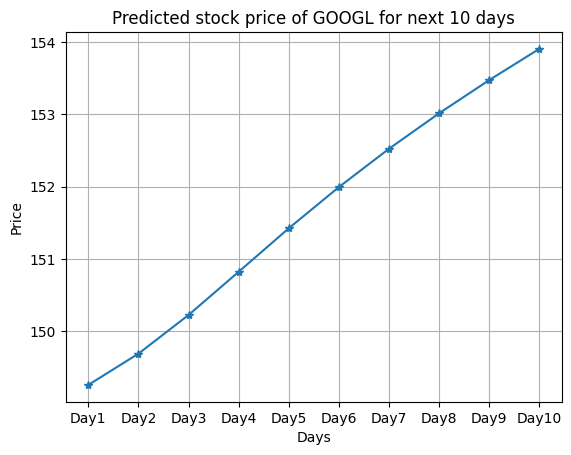

In [ ]:
plt.plot(predictions_next_10_days, marker='*')
plt.title(f'Predicted stock price of GOOGL for next 10 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 10), ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10'])
plt.grid(True)
plt.show()